# MSA 2025 Phase 2 - Part 1

In [214]:
import os
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Find all variables and understand them

First 10 instances from the dataset: features.csv


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-03-12,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-04-02,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-04-09,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


Mean and Standard Deviation from the dataset: features.csv


,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259


Distributions for numerical and categorical columns: features.csv


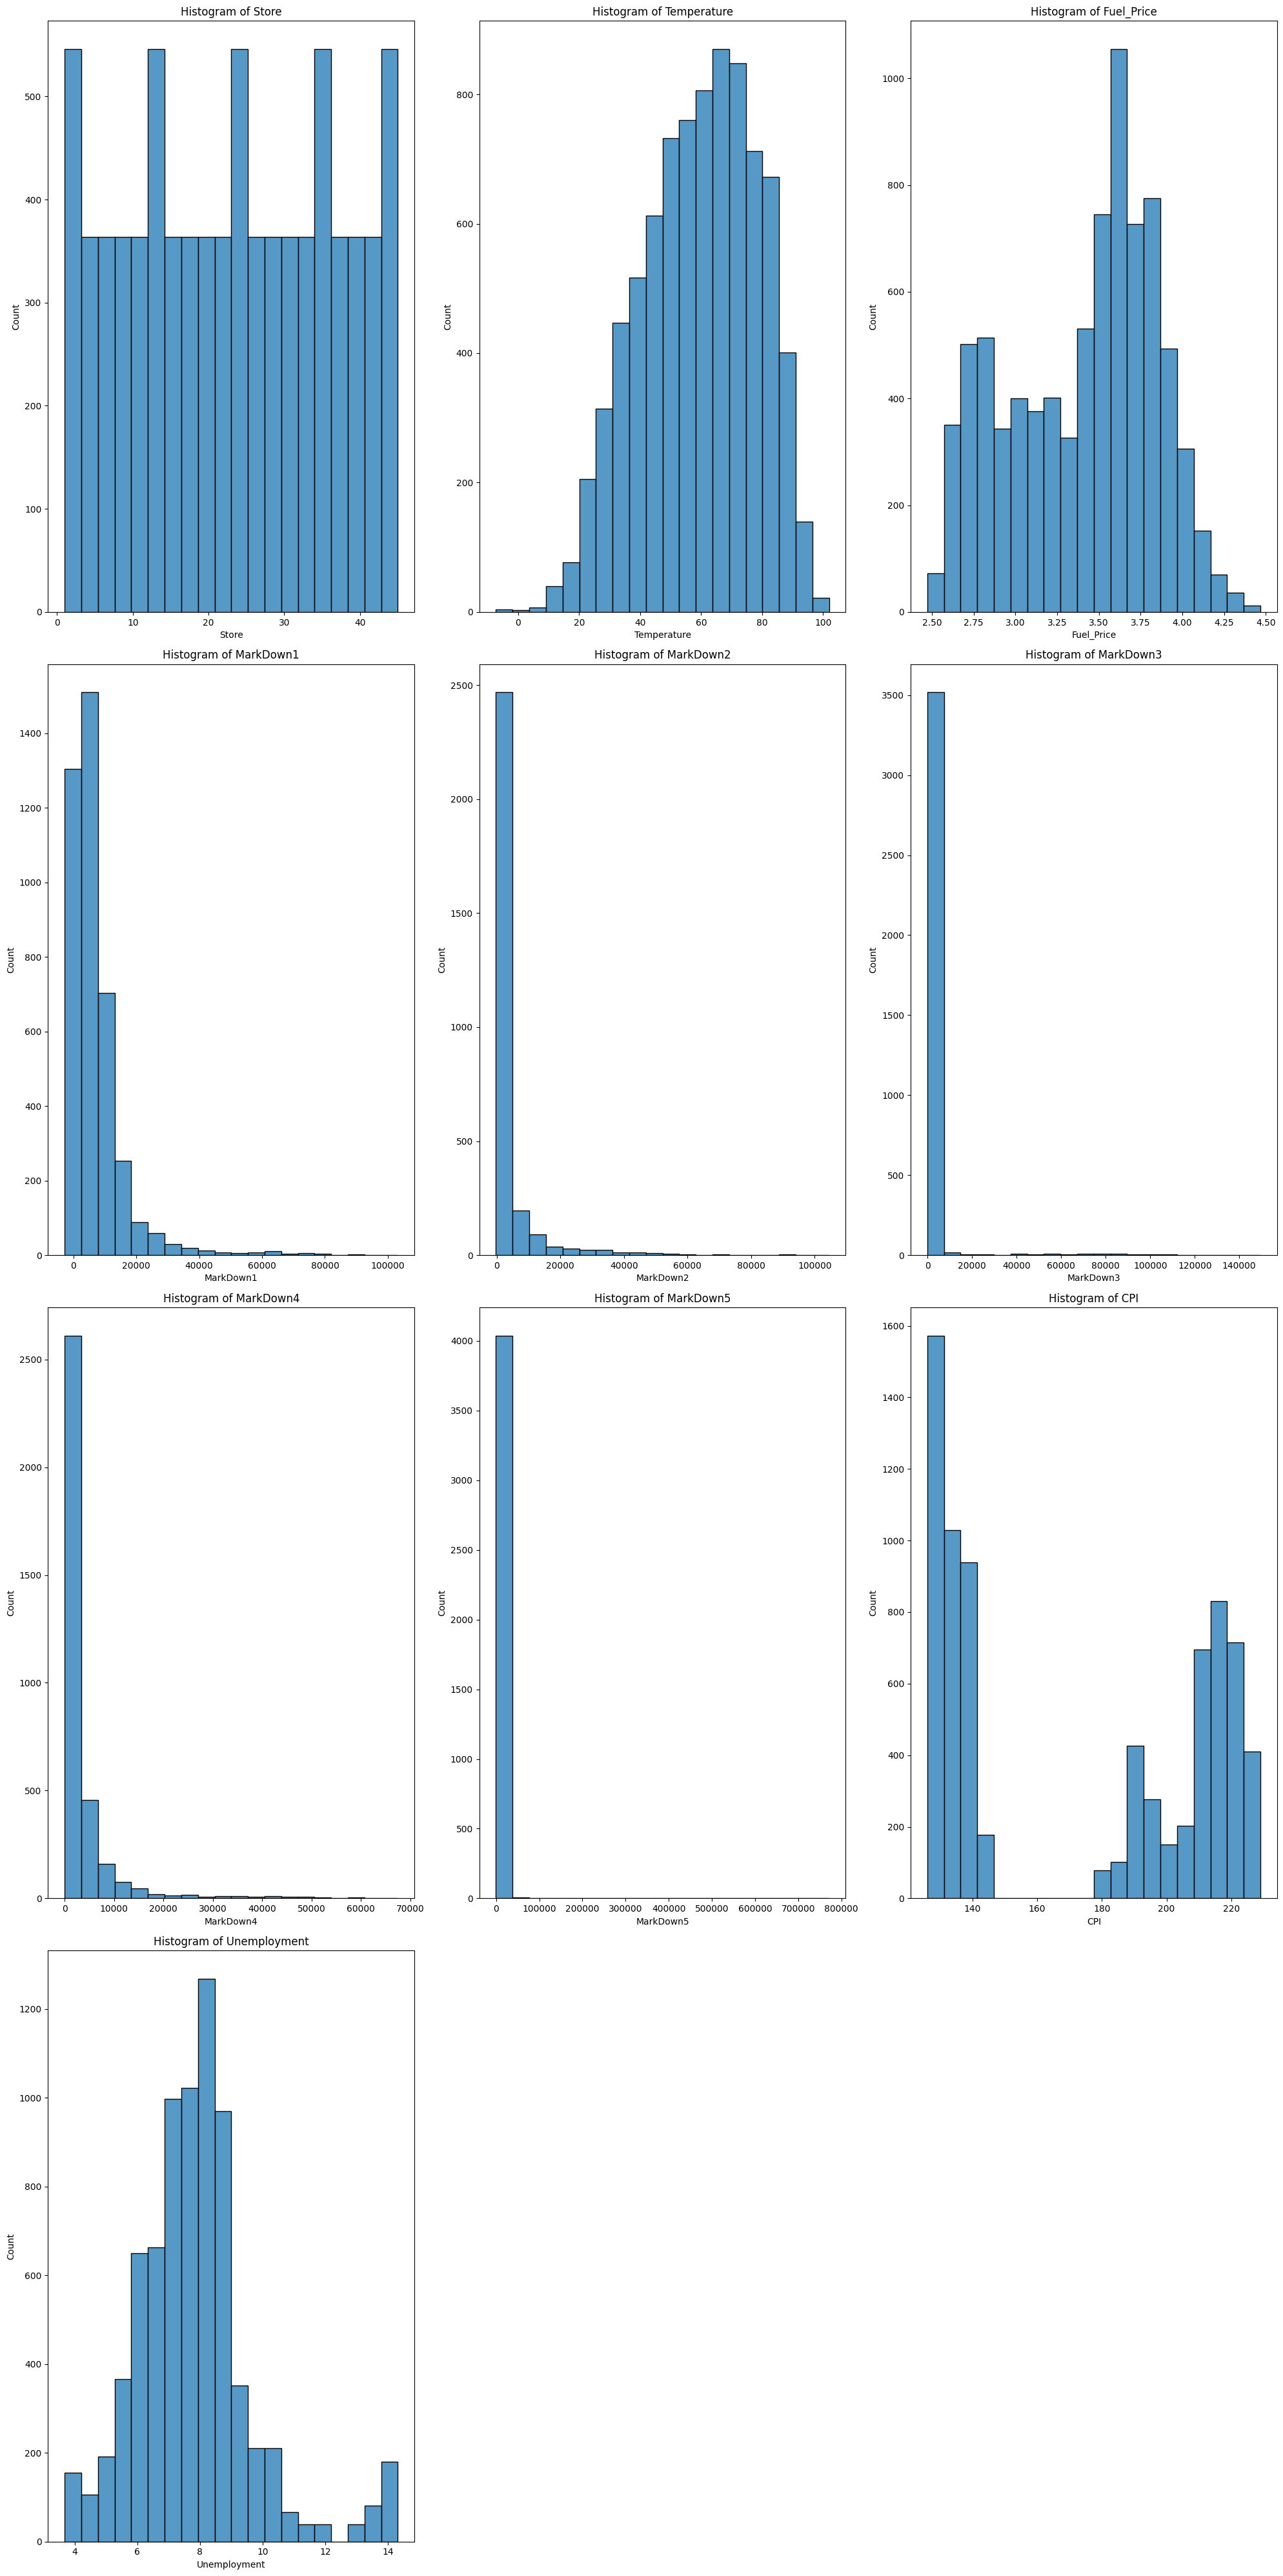

First 10 instances from the dataset: stores.csv


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


Mean and Standard Deviation from the dataset: stores.csv


,Store,Size
mean,23.000000,130287.600000
std,13.133926,63825.271991


Distributions for numerical and categorical columns: stores.csv


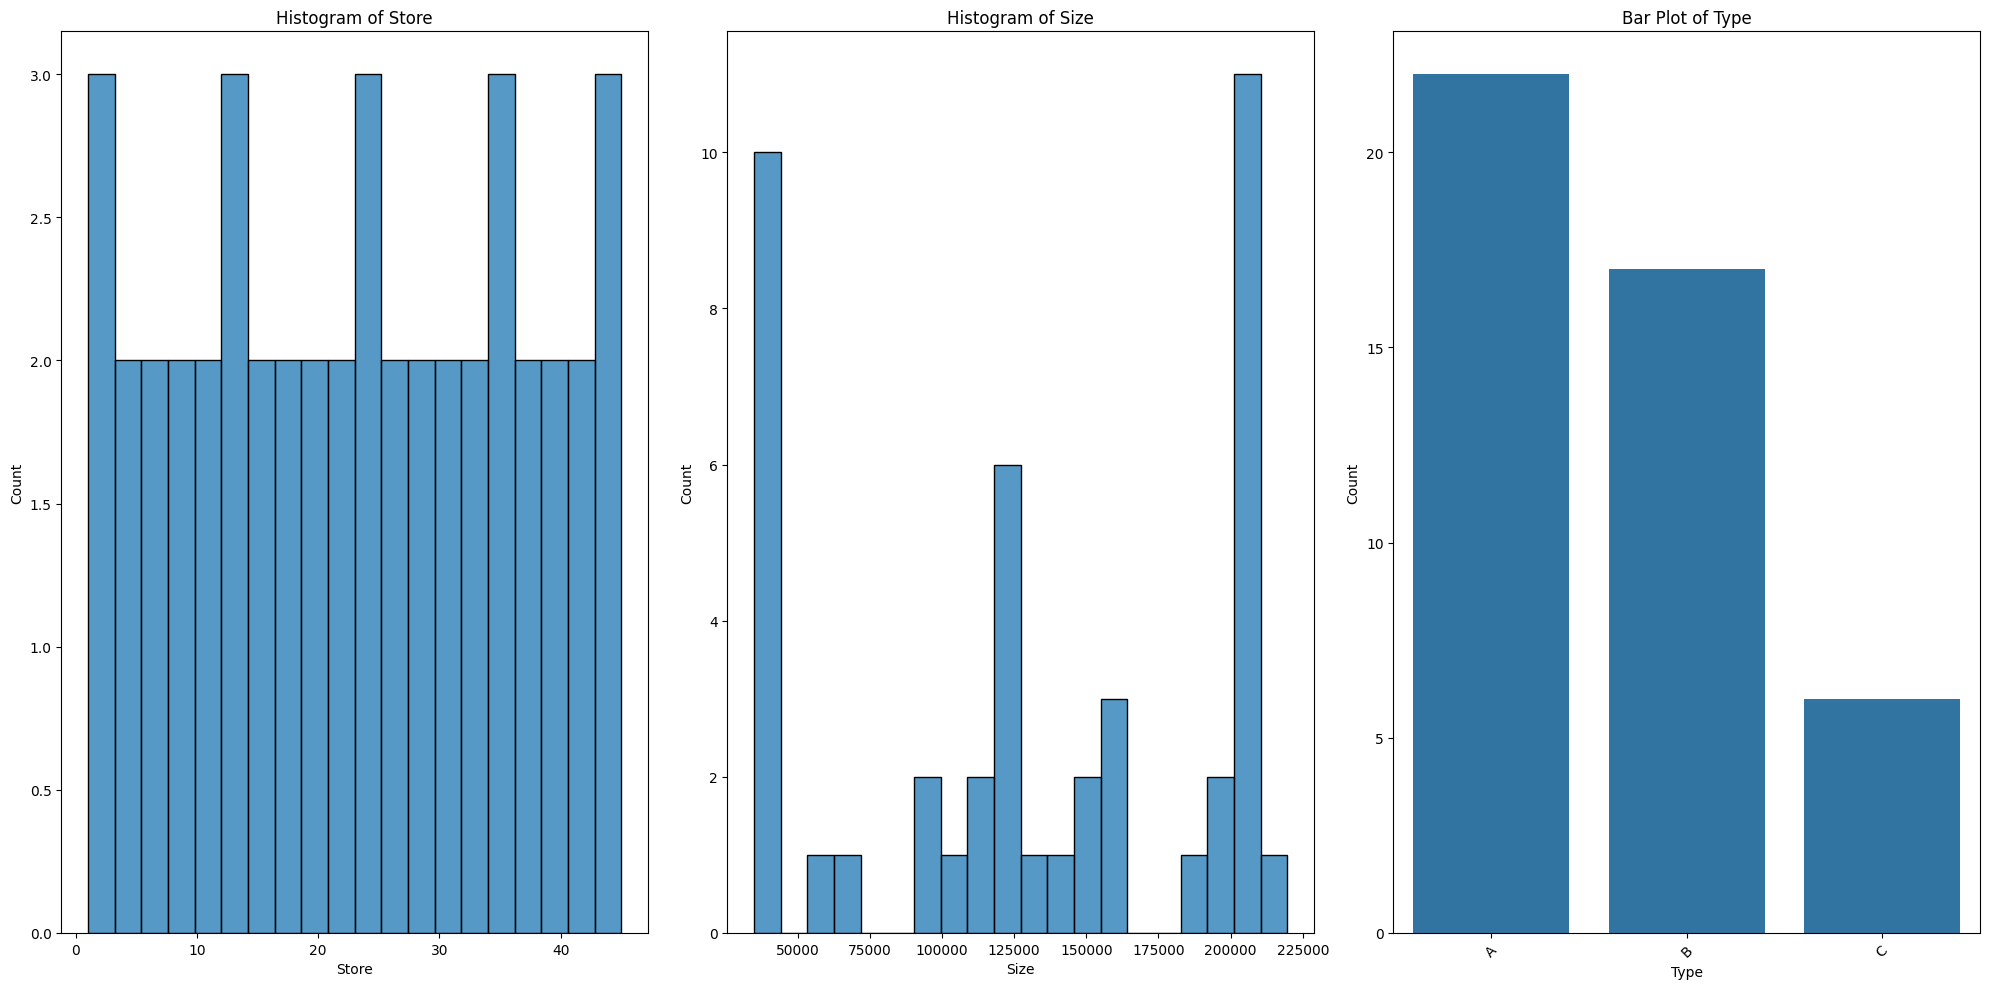

First 10 instances from the dataset: sales.csv


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


Mean and Standard Deviation from the dataset: sales.csv


,Store,Dept,Weekly_Sales
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519


Distributions for numerical and categorical columns: sales.csv


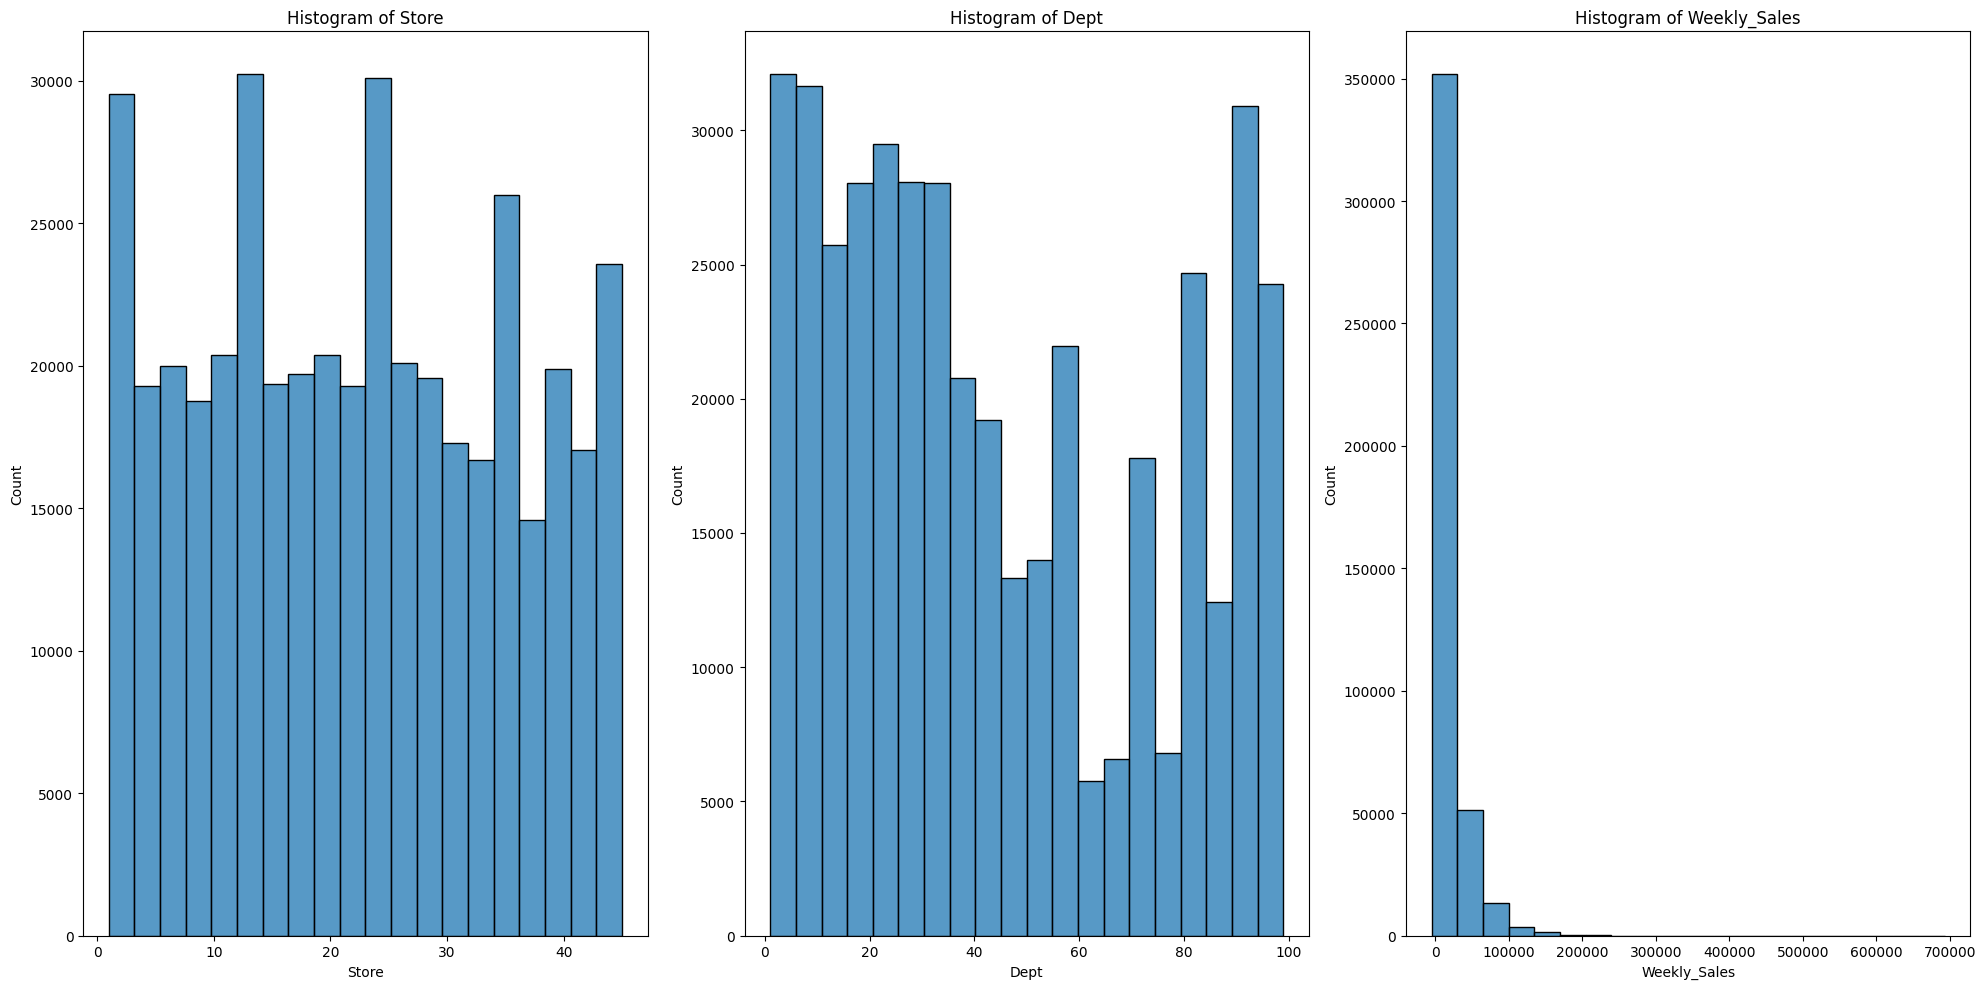

In [250]:
# Get the folder path containing the datasets
folder_path = 'datasets/W store sales'

# Loop through every file in the folder
for file in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file)

    # Load dataset into a dataframe 
    df = pd.read_csv(file_path)

    # First 10 instances of the dataset
    print(f"First 10 instances from the dataset: {file}")
    display(df.head(10))
    
    # Select numeric columns for statistical measures 
    print(f"Mean and Standard Deviation from the dataset: {file}")
    numeric_df = df.select_dtypes(include = 'number')
    display(numeric_df.agg(['mean', 'std']))


    # Plot histograms and bar plots depending on column type
    print(f"Distributions for numerical and categorical columns: {file}")

    # Identify column types
    numeric_cols = df.select_dtypes(include='number').columns
    categorical_cols = [
    col for col in df.columns
    if (
        df[col].dtype == 'object'
        or isinstance(df[col].dtype, pd.CategoricalDtype)
    )
    and not col.lower().startswith('date')
    ]


    # Combine both sets of columns for plotting
    plot_cols = list(numeric_cols) + categorical_cols
    n_cols = 3
    n_rows = (len(plot_cols) + n_cols - 1) // n_cols

    # Subplot grid for our graphs
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (20, 10 * n_rows))
    axes = axes.flatten()

    # Loop through columns and choose appropriate plot
    for i, col in enumerate(plot_cols):
        ax = axes[i]
        if col in numeric_cols: # Plot numerical columns as histograms
            sns.histplot(df[col], bins=20, ax=ax)
            ax.set_title(f'Histogram of {col}')
        else:
            counts = df[col].value_counts()
            sns.barplot(x=counts.index, y=counts.values, ax=ax) # Plot categorical columns as bar plots
            ax.set_title(f'Bar Plot of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')
            ax.tick_params(axis='x', rotation=45)
            
    # Delete unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Show plots
    plt.tight_layout()
    plt.show()
    
    # Transform the df dataframe fully numeri
    df_numeric = df.copy()
    # Find categorical columns again, including 'store'
    categorical_cols = [
        col for col in df_numeric.columns
        if (
            df_numeric[col].dtype == 'object'
            or isinstance(df_numeric[col].dtype, pd.CategoricalDtype)
            or col.lower() == 'store'
        )
        and not col.lower().startswith('date')
    ]
    df_numeric = pd.get_dummies(df_numeric, columns=categorical_cols, drop_first=True) # One-hot encode categorical columns
    for col in df_numeric.columns:
        df_numeric[col] = pd.to_numeric(df_numeric[col], errors='coerce')




## 2. Visualize Data

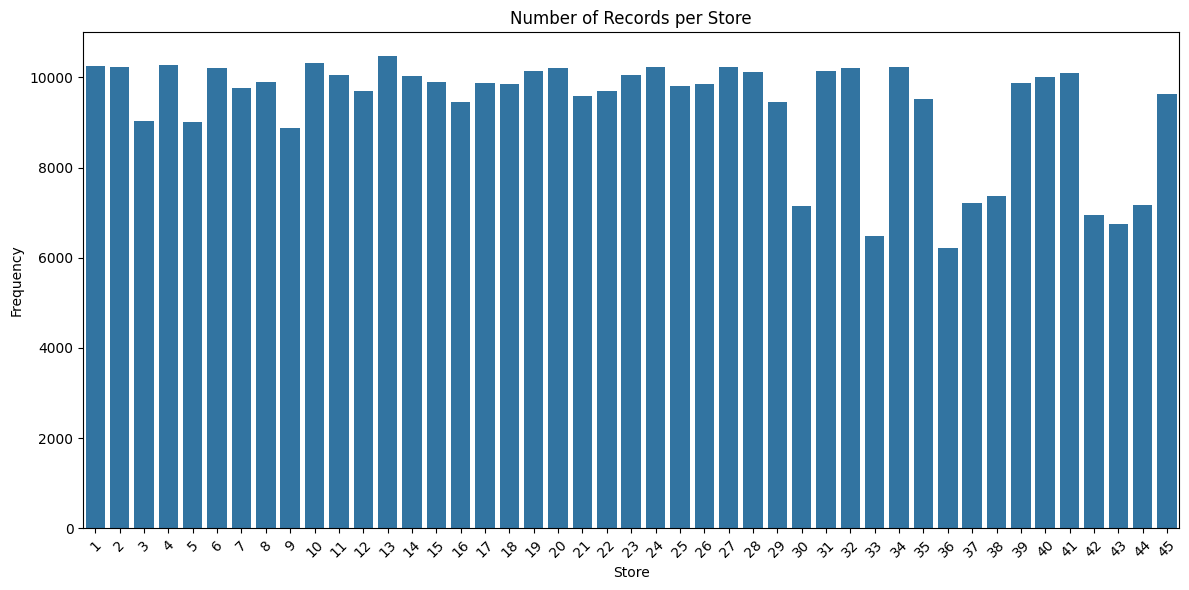

In [252]:

# Plotting all the categorical columns using one-hot encoding
if 'Store' in df.columns:
    plt.figure(figsize=(12, 6))
    store_counts = df['Store'].value_counts()
    sns.barplot(x=store_counts.index, y=store_counts.values)
    plt.xticks(rotation=45)
    plt.title("Number of Records per Store")
    plt.xlabel("Store")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()



## 3. Clean Data

In [248]:
#

## 4. Identify correlated variables

In [249]:
#

## 5. Summary